In [155]:
!pip install voyageai
!pip install plotly
!pip install pacmap
!pip install fast_hdbscan
!pip install jupyter-dash
!pip install matplotlib
!pip install nltk

You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tbnnu\projects\arxivscraper\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached regex-2023.12.25-cp310-cp310-win_amd64.whl (269 kB)


In [1]:
import pandas as pd
import json

In [2]:
papers = pd.read_csv("all_cs_papers_2012_2024.csv", index_col=0)

In [57]:
papers.head()

,title,id,abstract,categories,doi,created,updated,authors,affiliation,url
0,geometric complexity theory v: on deciding non...,704.0213,this article has been withdrawn because it has...,cs.cc,NaN,2007-04-02,2012-09-27,['ketan d. mulmuley hariharan narayanan'],[],https://arxiv.org/abs/0704.0213
1,the world as evolving information,704.0304,this paper discusses the benefits of describin...,cs.it cs.ai math.it q-bio.pe,10.1007/978-3-642-18003-3_10,2007-04-02,2010-10-13,['carlos gershenson'],[],https://arxiv.org/abs/0704.0304
2,pseudo-random puncturing: a technique to lower...,704.0361,it has been observed that particular rate-1/2 ...,cs.it math.it,10.1109/isit.2007.4557299,2007-04-03,NaN,"['ioannis chatzigeorgiou', 'miguel r. d. rodri...",[],https://arxiv.org/abs/0704.0361
3,a low complexity algorithm and architecture fo...,704.0590,we present an algorithm for systematic encodin...,cs.it math.it,10.1109/isit.2007.4557408,2007-04-04,2007-04-05,"['rachit agarwal', 'ralf koetter', 'emanuel po...",[],https://arxiv.org/abs/0704.0590
4,learning from compressed observations,704.0671,the problem of statistical learning is to cons...,cs.it cs.lg math.it,10.1109/itw.2007.4313111,2007-04-04,NaN,['maxim raginsky'],[],https://arxiv.org/abs/0704.0671


In [63]:
papers.shape

(487331, 10)

In [70]:
# see https://arxiv.org/category_taxonomy for what these categories mean
# note we use `|` for `OR` operation to mention all of these categories
# filter_string = 'cs.ai|cs.cl|cs.cv|cs.db|cs.dc|cs.ar|cs.lg|cs.ma|cs.ne|cs.ro|cs.sy' # all CS interests
# filter_string = 'cs.ar|cs.db|cs.dc|cs.os|cs.ro|cs.sy' # systems interests
filter_string = 'cs.ai|cs.cl|cs.cv|cs.lg|cs.ma|cs.ne|cs.ro' # AI only interests
filtered_papers = papers[papers['categories'].str.contains(filter_string, case=False, na=False)]
filtered_papers = filtered_papers.sort_values(by='created')

In [71]:
filtered_papers.shape

(259607, 10)

In [52]:
words = 0
for abstract in filtered_papers['abstract']:
    words += len(abstract.split(" "))

In [53]:
print(words)

28629446


In [54]:
29000000 / 250 / 60

1933.3333333333333

In [87]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

random_papers = papers.sample(n=128 * 5, replace=False)
random_abstracts = list(random_papers['abstract'])

In [105]:
import voyageai

vo = voyageai.Client(api_key="pa-hG9EnKz2smFWIIcLp0S1OXG_K4tPZFa39gPCKnPzK4E")
embs = []
for b in batch(random_abstracts, 128):
    result = vo.embed(b, model="voyage-2", input_type="document")
    embs += result.embeddings

In [106]:
len(embs)

640

In [108]:
from pacmap import PaCMAP

clusterisable_dimensions = 40
map_dimensions = 2

# reduce dim of embedding vectors
config = dict(
    n_neighbors=None, # NOTE We set `n_neighbors` to `None` instead of the 
    apply_pca=False,  # default 10 to get PaCMAP to size the neighborhood 
    save_tree=True,   # based on the number of vectors.
    verbose=True,
)
clusterisabilitisation_model = PaCMAP(n_components=clusterisable_dimensions, **config,)
mapping_model = PaCMAP(n_components=map_dimensions, **config,)

clusterisable_vectors = clusterisabilitisation_model.fit_transform(embs).tolist()
map_vectors = mapping_model.fit_transform(embs).tolist()

X is normalized
PaCMAP(n_neighbors=10, n_MN=5, n_FP=20, distance=euclidean, lr=1.0, n_iters=450, apply_pca=False, opt_method='adam', verbose=True, intermediate=False, seed=None)
Finding pairs
Found nearest neighbor
Calculated sigma
Found scaled dist
Pairs sampled successfully.
((6400, 2), (3200, 2), (12800, 2))
Initial Loss: 7880.23828125
Iteration:   10, Loss: 17371.154297
Iteration:   20, Loss: 6884.985840
Iteration:   30, Loss: 5790.444336
Iteration:   40, Loss: 5193.414062
Iteration:   50, Loss: 4827.218262
Iteration:   60, Loss: 4586.410156
Iteration:   70, Loss: 4382.928711
Iteration:   80, Loss: 4178.326172
Iteration:   90, Loss: 3951.424316
Iteration:  100, Loss: 3676.435791
Iteration:  110, Loss: 4800.815918
Iteration:  120, Loss: 4745.486328
Iteration:  130, Loss: 4727.038086
Iteration:  140, Loss: 4721.993164
Iteration:  150, Loss: 4723.375000
Iteration:  160, Loss: 4727.610840
Iteration:  170, Loss: 4728.304688
Iteration:  180, Loss: 4733.649414
Iteration:  190, Loss: 4735.

In [154]:
import numpy as np
from math import ceil
from fast_hdbscan import HDBSCAN

min_cluster_size = 2
min_samples = 1

np_vecs = np.array(clusterisable_vectors)
clusterer = HDBSCAN(
    min_cluster_size=min_cluster_size,
    min_samples=min_samples,
)

clusterer.fit(np_vecs)

HDBSCAN(min_cluster_size=2, min_samples=1)

In [ ]:
import re
import math
import nltk
import nltk.corpus

from collections import Counter, defaultdict

def tfidfify(
    texts: list[str],
    clusters: list[int],
    stopwords: list[str] = nltk.corpus.stopwords.words('english'),
    min_df: int = None,
) -> dict[int, list[tuple[str, float]]]:
    """Compute the tf-idf of every token of every cluster in the provided clusters of texts.
    
    Args:
        texts (list[str]): A list of texts.
        
        clusters (list[int]): A list of integers, where each integer represents the
            cluster that the corresponding text belongs to.
        
        stopwords (list[str], optional): A list of stopwords to exclude from the
            vocabulary. Defaults to `nltk.corpus.stopwords.words('english')`. It is
            very much worth it to supplement NLTK's English stopwords with your own
            domain-specific stopwords, as I also did.
        
        min_df (int, optional): The minimum document frequency of a token for it to
            be included in the vocabulary. Defaults to `None`, in which case, it is
            set to 0.0075% of the dataset's size (rounded) or 1, whichever is greater.
    
    Returns:
        dict[int, list[tuple[str, float]]]: A dictionary, where each key is a cluster
            and each value is a list of tuples, where each tuple contains a token and
            its tf-idf, sorted by tf-idf in descending order."""
    
    # If a minimum document frequency has not been specified, set it to 0.0075% of the
    # dataset's size (rounded) or 1, whichever is greater.
    if min_df is None:
        min_df = max(1, round(len(texts) * 0.000075))
    
    # Lowercase the texts.
    texts = [text.lower() for text in texts]
    
    # Tokenise the texts.
    tokens = [nltk.wordpunct_tokenize(text) for text in texts]
    
    # Count the frequency of tokens in the texts.
    frequencies = [Counter(doc_tokens) for doc_tokens in tokens]

    # Construct our vocabulary.
    vocab = defaultdict(lambda: [0, 0])

    for doc_frequencies in frequencies:
        for token, frequency in doc_frequencies.items():
            vocab[token][0] += 1
            vocab[token][1] += frequency

    # Sort the vocabulary by document frequency.
    vocab = sorted(vocab.items(), key=lambda token_frequencies: token_frequencies[1][0],
                   reverse=True)

    # Filter out tokens:
    # - With document frequencies less than or equal to `min_df`;
    # - That contain non-alphabetical characters; and
    # - That are stopwords.
    vocab = [token for token, (doc_frequency, _) in vocab
             if doc_frequency > min_df and re.match(r'^[a-z]+$', token)
             and token not in stopwords]
    vocab = {token: i for i, token in enumerate(vocab)}

    vocab_len = len(vocab)
    clusters_frequencies = {cluster: [0]*vocab_len for cluster in set(clusters)}

    for cluster, doc_frequencies in tqdm(zip(clusters, frequencies), total=len(clusters)):
        for token, frequency in doc_frequencies.items():
            # Skip out-of-vocabulary tokens.
            if token not in vocab:
                continue
            
            # Add the token's frequency in the document to the cluster's frequency for that token.
            clusters_frequencies[cluster][vocab[token]] += frequency

    # Compute the relative frequencies of tokens in clusters as well as inverse document frequencies.
    idf = [0]*vocab_len

    for cluster, cluster_frequencies in clusters_frequencies.items():
        # Compute the total number of (in-vocabulary) tokens in the cluster.
        total_tokens = sum(cluster_frequencies)
        
        for i, frequency in enumerate(cluster_frequencies):
            # Skip tokens that do not appear in the cluster.
            if not frequency:
                continue
            
            # Increment the inverse document frequency for the token.
            idf[i] += 1
            
            # Calculate the frequency of the token relative to the total number of tokens
            # in the cluster.
            clusters_frequencies[cluster][i] = frequency / total_tokens

    # Cache the number of clusters.
    cluster_len = len(clusters_frequencies)

    # Compute the inverse document frequency for each token.
    idf = [math.log(cluster_len / frequency) if frequency else 0 for frequency in idf]

    # Compute the TF-IDF scores for each token in each cluster.
    tfidf = {cluster: [clusters_frequencies[cluster][i]*idf[i] for i in range(vocab_len)]
             for cluster in clusters_frequencies}
    
    # Sort the tokens in each cluster by their TF-IDF scores.
    tfidf = {cluster: sorted(enumerate(cluster_tfidf),
                             key=lambda token_tfidf: token_tfidf[1], reverse=True)
             for cluster, cluster_tfidf in tfidf.items()}
    
    # Store a list version of the vocabulary.
    vocab_list = list(vocab)
    
    # Map the token indices back to their respective tokens.
    tfidf = {cluster: [(vocab_list[token], tfidf) for token, tfidf in cluster_tfidf]
             for cluster, cluster_tfidf in tfidf.items()}
    
    return tfidf

In [133]:
clusters = clusterer.labels_.tolist()
labels = {c:c for c in clusters}
fig = plot(map_vectors, clusters, labels)

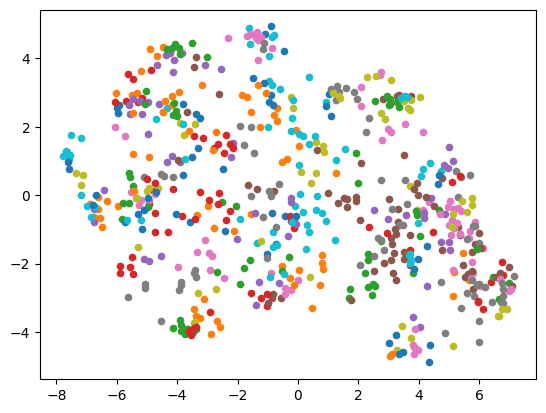

In [153]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = np.array([p[0] for p in map_vectors])
scatter_y = np.array([p[1] for p in map_vectors])

fig, ax = plt.subplots()
for g in np.unique(clusters):
    ix = np.where(clusters == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], label = g, s = 20)
plt.show()

In [19]:
13*44*(780+439+1059+621)

1658228

In [21]:
(13*44*(780+439+1059+621)) / (250*60)

110.54853333333334

In [16]:
words

53102067

In [17]:
words / ( 13*44*(780+439+1059+621))

32.02338098259106

In [22]:
110.5*32

3536.0